# WRT - AT - Technical Assessment - EDA
Notebook for exploring the raw data, performing data manipulation in preparation for modelling and analysing relationships within the data.

## Setup

In [135]:
# load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [136]:
# setup notebook
pd.set_option("display.max_columns", None)

## Load

In [137]:
# load data
directory_path = "/Users/nb1777/Git/wrt_at"
file_path = "vehicle_price_prediction/vehicle_price_prediction/data/at_vehicle_data.csv"
df_raw = pd.read_csv("/".join([directory_path, file_path]))

## Explore

In [138]:
# examine - example data
df_raw.head(5)

,make,model,body_type,fuel_type,engine_size,transmission,derivative,plate,year,mileage,price,colour,area,price_position,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,BMW,X1,SUV,Petrol,2.0,Automatic,2.0 20i xLine Auto xDrive Euro 6 (s/s) 5dr,21,2021.0,13434,32000,Blue,BS,100.4,1,1,1,0,1,1,0,1,1,1
1,BMW,2 Series Gran Coupe,Saloon,Petrol,1.5,Automatic,218i M Sport Gran Coupe,71,2021.0,6347,32898,Blue,G,111.3,1,0,1,0,0,0,1,0,0,0
2,BMW,2 Series Gran Coupe,Saloon,Petrol,1.5,Manual,1.5 218i M Sport Euro 6 (s/s) 4dr,NaN,NaN,10,35510,Blue,PE,NaN,1,1,1,0,1,0,1,1,0,0
3,BMW,4 Series,Coupe,Diesel Hybrid,2.0,Automatic,2.0 420d MHT M Sport Auto Euro 6 (s/s) 2dr,71,2022.0,6500,37999,Grey,B,102.5,1,1,1,0,1,1,1,0,0,0
4,BMW,1 Series,Hatchback,Diesel,2.0,Manual,2.0 116d Sport Euro 5 (s/s) 5dr,62,2012.0,136952,4890,Black,S,99.1,0,0,0,0,0,0,0,0,0,0


### Shape

In [139]:
# examine - dimensions
nrows = df_raw.shape[0]
ndp = df_raw.shape[0] * df_raw.shape[1]
print(df_raw.shape)

(9753, 24)


### Unique

In [140]:
# examine – unique values per column
for col in df_raw.columns:
    print(f"{col} (nunique:{df_raw[col].nunique()})\n{df_raw[col].unique()}\n")

make (nunique:1)
['BMW']

model (nunique:58)
['X1' '2 Series Gran Coupe' '4 Series' '1 Series' '2 Series Gran Tourer'
 '2 Series' 'X4' '2 Series Active Tourer' '7 Series' '3 Series' '5 Series'
 '6 Series Gran Turismo' 'X3' 'iX' 'iX3' 'i3' 'Z4' '6 Series' 'M4'
 'M8 Gran Coupe' 'X5' 'X7' '4 Series Gran Coupe' 'X6' 'M2'
 '3 Series Gran Turismo' 'X2' '8 Series' 'M3' 'M6 Gran Coupe' 'M6' 'i4'
 '6 Series Gran Coupe' '8 Series Gran Coupe' 'X4 M' 'M5' 'X5 M' 'i7' 'Z8'
 'Z3' 'Alpina Unspecified Models' 'X3 M' 'i8' 'Z4 M' 'M8'
 '5 Series Gran Turismo' 'Alpina D4' 'Alpina D5' 'X6 M' 'Alpina B5'
 'Alpina D3' 'Alpina B6' 'Z3 M' 'Alpina B3' 'Alpina XD3' 'M1' 'iX1'
 'Alpina B10']

body_type (nunique:8)
['SUV' 'Saloon' 'Coupe' 'Hatchback' 'MPV' 'Estate' 'Convertible'
 'Unlisted']

fuel_type (nunique:7)
['Petrol' 'Diesel Hybrid' 'Diesel' 'Electric' 'Petrol Plug-in Hybrid'
 'Petrol Hybrid' 'Unlisted']

engine_size (nunique:24)
[2.  1.5 3.  nan 0.  4.4 1.6 3.2 2.5 4.9 1.8 4.  2.8 6.6 1.9 2.2 3.5 4.8
 5. 

- All vehicles are BMWs
- Various vehicles models are included (58 variants)
- Different body types are included, including 'Unlisted' (8 variants)
- Different fuel types are included, including 'Unlisted' (7 variants)
- Different engine sizes are included, including NAs and 0. (24 variants)
- Three transmission values, including 'Unlisted' (3 variants)
- Many derivates (2024 variants) -> how should these be handled?
- Many plate values, including NAs and letters (57 variants) -> how should they be handled?
- Multiple years, including NAs (34 variants)
- Many mileage values (6287 variants)
- Many prices values (6287 variants)
- Different colours (15 variants)
- Many unique area values (115 variants) -> what is this value, likely postcode...?
- Various price position values (456 variants) -> to be investigated as part of analysis
- Binary values for features 1 - 10 (2 variants) -> as expected, binary classification (one-hot encoding of feature)


### Data Types

In [141]:
# examine - data types
print(df_raw.dtypes)

make               object
model              object
body_type          object
fuel_type          object
engine_size       float64
transmission       object
derivative         object
plate              object
year              float64
mileage             int64
price               int64
colour             object
area               object
price_position    float64
feature_1           int64
feature_2           int64
feature_3           int64
feature_4           int64
feature_5           int64
feature_6           int64
feature_7           int64
feature_8           int64
feature_9           int64
feature_10          int64
dtype: object


In [142]:
# extract - column types
# initialise lists
binary_columns = []
numeric_columns = []
categorical_columns = []

# iterate through df.dtypes (columns x data type pair)
for column, dtype in df_raw.dtypes.items():
    # column name containing 'feature_' is binary
    if "feature" in column:
        binary_columns.append(column)
    # other numerical columns are numerics
    elif pd.api.types.is_numeric_dtype(dtype):
        numeric_columns.append(column)
    # else categorical
    else:
        categorical_columns.append(column)

# output
print("Binary Columns:", binary_columns)
print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)

Binary Columns: ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10']
Numeric Columns: ['engine_size', 'year', 'mileage', 'price', 'price_position']
Categorical Columns: ['make', 'model', 'body_type', 'fuel_type', 'transmission', 'derivative', 'plate', 'colour', 'area']


### Summary

In [143]:
# summary statistics
df_raw.describe()

,engine_size,year,mileage,price,price_position,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
count,9611.000000,8923.000000,9753.000000,9753.000000,8539.000000,9753.000000,9753.000000,9753.000000,9753.000000,9753.000000,9753.000000,9753.000000,9753.000000,9753.000000,9753.000000
mean,2.228166,2016.712877,45034.542295,27505.817902,99.654152,0.746642,0.692300,0.634984,0.079155,0.525377,0.643494,0.769404,0.053419,0.457808,0.077002
std,0.799134,4.076801,36637.947183,20213.797435,6.141229,0.434956,0.461565,0.481459,0.269995,0.499381,0.478992,0.421236,0.224880,0.498242,0.266608
min,0.000000,1982.000000,0.000000,1090.000000,41.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2015.000000,15501.000000,14390.000000,96.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,2018.000000,37500.000000,21999.000000,99.500000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,3.000000,2019.000000,68460.000000,34500.000000,102.600000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,6.600000,2023.000000,240000.000000,225000.000000,167.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Missing values evident as count not equal to number of rows (9753) -> handling of missing values is required
- Engine size of 0 needs investigating
- Year, Mileage and Price may contain 'outliers'

### Missing Values

In [144]:
# missing values
df_raw.isna().sum()

make                 0
model                0
body_type            0
fuel_type            0
engine_size        142
transmission         0
derivative           4
plate              801
year               830
mileage              0
price                0
colour             142
area                 0
price_position    1214
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
feature_9            0
feature_10           0
dtype: int64

In [145]:
# percentage missingness
## total data points
ndp_missing = df_raw.isna().sum().sum()
print(f"Missingness (Total Data Points): {ndp_missing/ndp:.2%}")

## data points, ignoring `price_position`
ndp_missing_alt = df_raw.drop(["price_position"], axis=1).isna().sum().sum()
print(
    f"Missingness (Data Points, `price_position` dropped): {ndp_missing_alt/(ndp-(1*nrows)):.2%}"
)

## total rows
df_complete = df_raw.dropna()
nrows_complete = df_complete.shape[0]
print(f"Missingness (Total Rows): {1 - (nrows_complete/nrows):.2%}")

## rows, ignoring `price_position`
df_complete_alt = df_raw.drop(["price_position"], axis=1).dropna()
nrows_complete_alt = df_complete_alt.shape[0]
print(
    f"Missingness (Rows, `price_position` dropped): {1 - (nrows_complete_alt/nrows):.2%}"
)

Missingness (Total Data Points): 1.34%
Missingness (Data Points, `price_position` dropped): 0.86%
Missingness (Total Rows): 13.02%
Missingness (Rows, `price_position` dropped): 9.38%


- Ignoring `price_position` 9.4% of the rows will be dropped due to missingness if no handling of missing values is performed
- Overall, less than 1% of data is missing, but it is distributed across rows rather than within rows

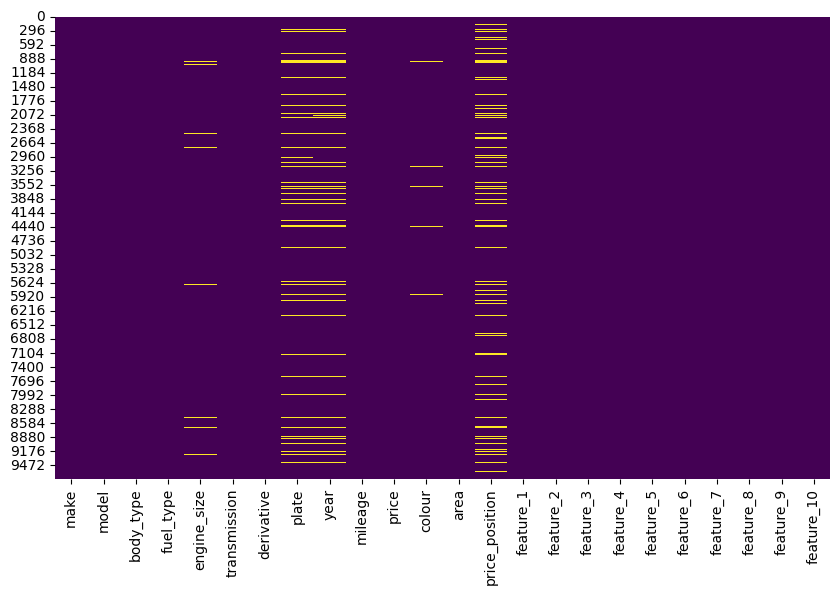

In [146]:
# visualizing missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df_raw.isna(), cbar=False, cmap="viridis")
plt.show()

- Missing values present -> handle missingness to ensure most complete dataset possible
- Can missing values in `engine_size` be extracted from `derivate` (which contains no missing values)?
- `plate` and `year` are almost entirely aligned when values are missing -> can do some substituion to help populate missing values?
- Missing values in `colour` could be replaced with unknown instead of dropping?
- Missing values in `price_position` are not important at this time, as feature is not to be used in model


### Duplicates

In [147]:
# duplicates
print(f"Number of duplicate rows: {df_raw.duplicated(keep=False).sum()}")

# duplicated rows
df_raw[df_raw.duplicated(keep=False) == True].sort_values(list(df_raw.columns))

Number of duplicate rows: 6


,make,model,body_type,fuel_type,engine_size,transmission,derivative,plate,year,mileage,price,colour,area,price_position,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
1233,BMW,1 Series,Hatchback,Petrol,2.0,Automatic,2.0 M135i Auto xDrive Euro 6 (s/s) 5dr,NaN,NaN,10,47940,NaN,BS,NaN,1,1,1,0,0,0,1,0,0,0
5578,BMW,1 Series,Hatchback,Petrol,2.0,Automatic,2.0 M135i Auto xDrive Euro 6 (s/s) 5dr,NaN,NaN,10,47940,NaN,BS,NaN,1,1,1,0,0,0,1,0,0,0
2090,BMW,3 Series,Saloon,Diesel,2.0,Manual,2.0 320d M Sport Euro 5 (s/s) 4dr,13,2013.0,123298,8250,White,CV,101.6,1,1,1,0,0,1,1,0,0,0
7152,BMW,3 Series,Saloon,Diesel,2.0,Manual,2.0 320d M Sport Euro 5 (s/s) 4dr,13,2013.0,123298,8250,White,CV,101.6,1,1,1,0,0,1,1,0,0,0
6385,BMW,5 Series,Estate,Diesel Hybrid,2.0,Automatic,2.0 520d MHT M Sport Touring Steptronic Euro 6...,NaN,NaN,10,47829,Grey,BS,NaN,1,1,1,0,1,0,1,0,0,0
6702,BMW,5 Series,Estate,Diesel Hybrid,2.0,Automatic,2.0 520d MHT M Sport Touring Steptronic Euro 6...,NaN,NaN,10,47829,Grey,BS,NaN,1,1,1,0,1,0,1,0,0,0


### !!! Remove Duplicates !!!

- duplicate rows identified (see above) -> keep first row per duplicate-pair

In [148]:
df_temp = df_raw.drop_duplicates(keep="first")
df_temp.shape

(9750, 24)

### Distributions

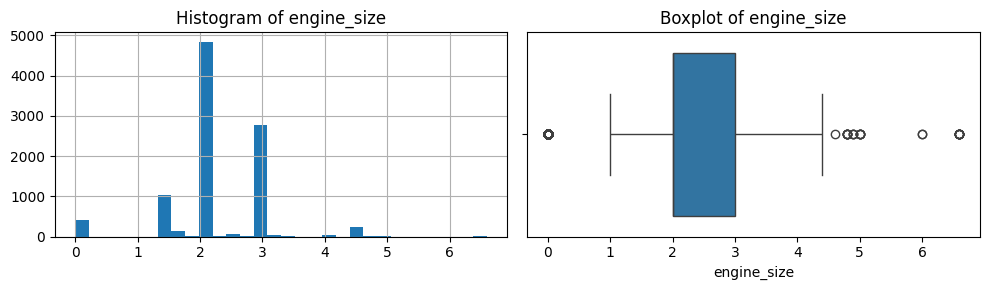

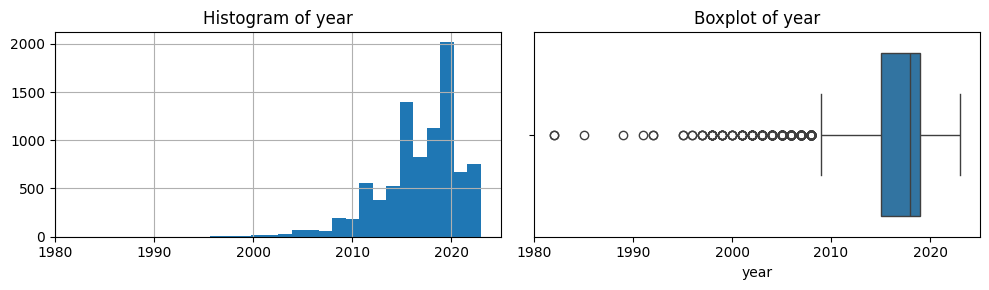

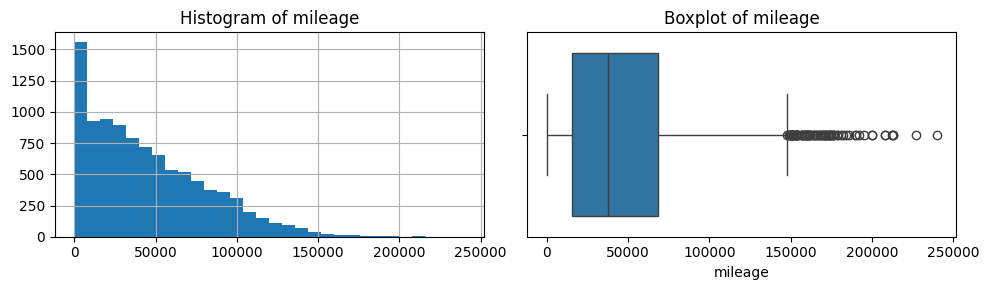

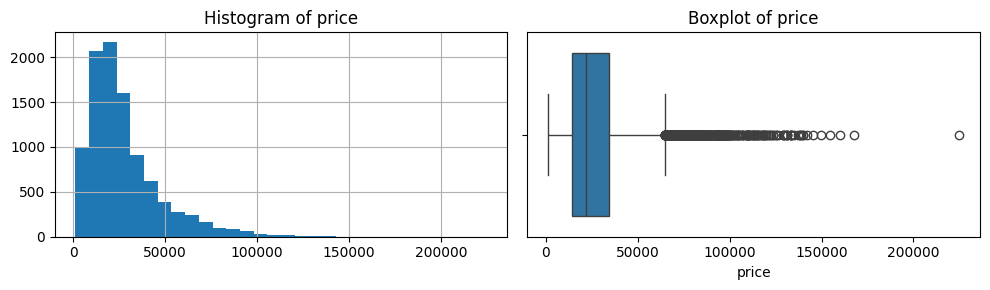

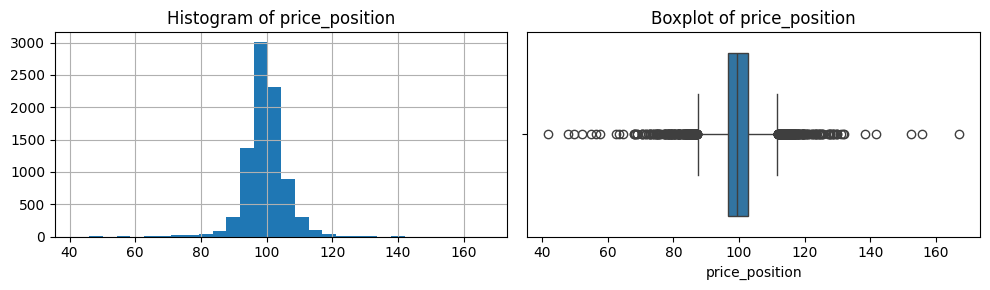

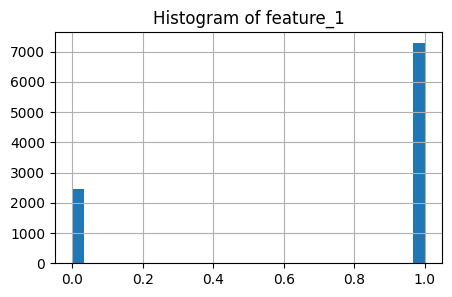

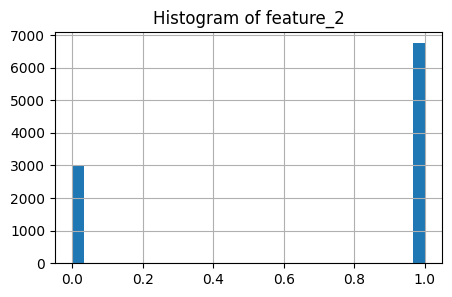

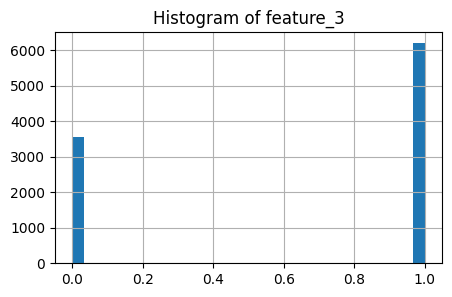

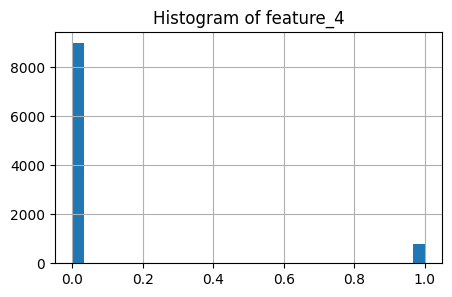

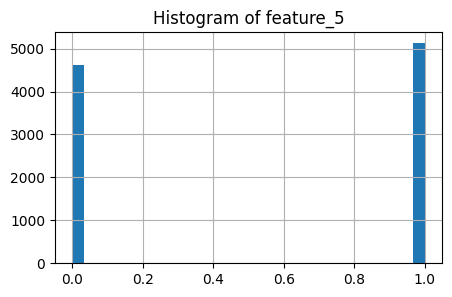

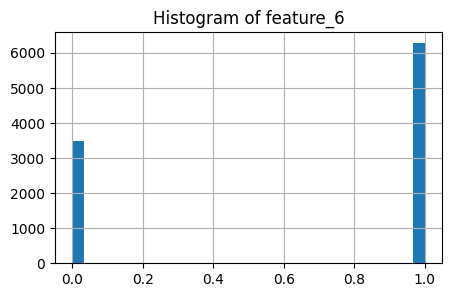

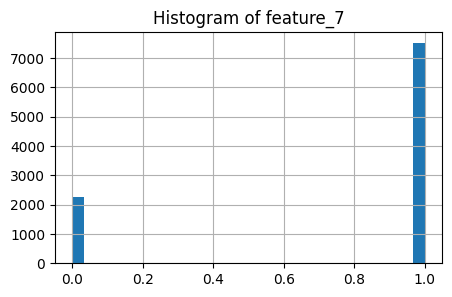

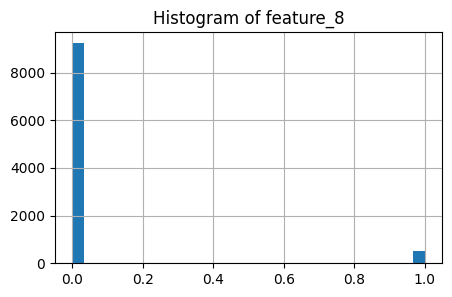

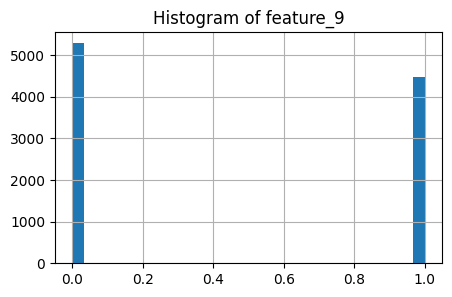

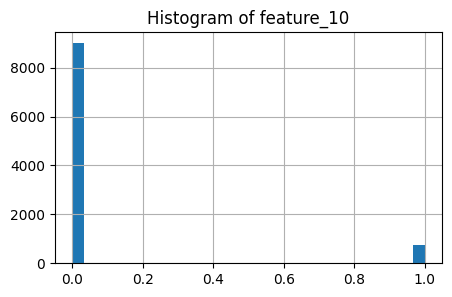

In [149]:
# visualise the distributions of numerical and binary variables
for col in numeric_columns + binary_columns:

    # check if "feature_" is in the column name (binary variable)
    if "feature_" in col:
        # histogram only
        plt.figure(figsize=(5, 3))
        df_temp[col].hist(bins=30)
        plt.title(f"Histogram of {col}")
        plt.show()

    else:
        # histogram and boxplot side by side
        fig, ax = plt.subplots(1, 2, figsize=(10, 3))

        df_temp[col].hist(bins=30, ax=ax[0])
        ax[0].set_title(f"Histogram of {col}")

        sns.boxplot(data=df_temp, x=col, ax=ax[1])
        ax[1].set_title(f"Boxplot of {col}")

        plt.tight_layout()
        plt.show()

- some questionable values that need investigating/addressing:
    - `engine_size` = 0 -> what does a `engine_size` of 0 represent, 'Electric' vehciles maybe?
    - `price` = 0 -> are these missing values/errors? Can't imagine cars are being given away for free?

## Correlations

For the purpose of correlation calculations, rows with missing values are dropped - so that the relationships between variables and the target variable (price) can be established without the presence of missingness.
The `price_position` variable is ignored in this analyis.

### Numerical Correlations

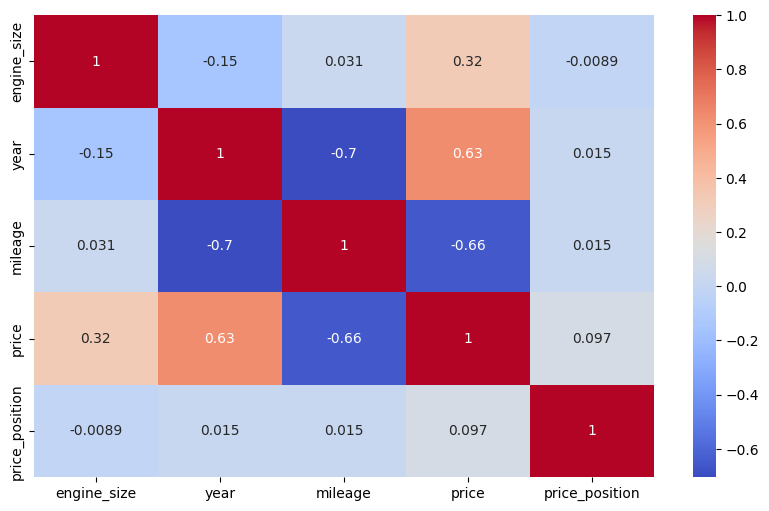

In [150]:
# data correlations
df_numeric = df_temp[numeric_columns]
# although there is missingness, the `corr` function using the pairwise complete observations method
# correlation calculated for each pair of columns using rows where both columns have valid (non-NaN) data.
correlation_matrix = df_numeric.corr()

# heatmap of correlation index
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

/var/folders/vr/53g6891d1f95k7gpttqp4mvm0000gn/T/ipykernel_58277/1675169789.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("coolwarm")
/var/folders/vr/53g6891d1f95k7gpttqp4mvm0000gn/T/ipykernel_58277/1675169789.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.index, y=target_corr.values, palette=colors)
/var/folders/vr/53g6891d1f95k7gpttqp4mvm0000gn/T/ipykernel_58277/1675169789.py:15: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=target_corr.index, y=target_corr.values, palette=colors)


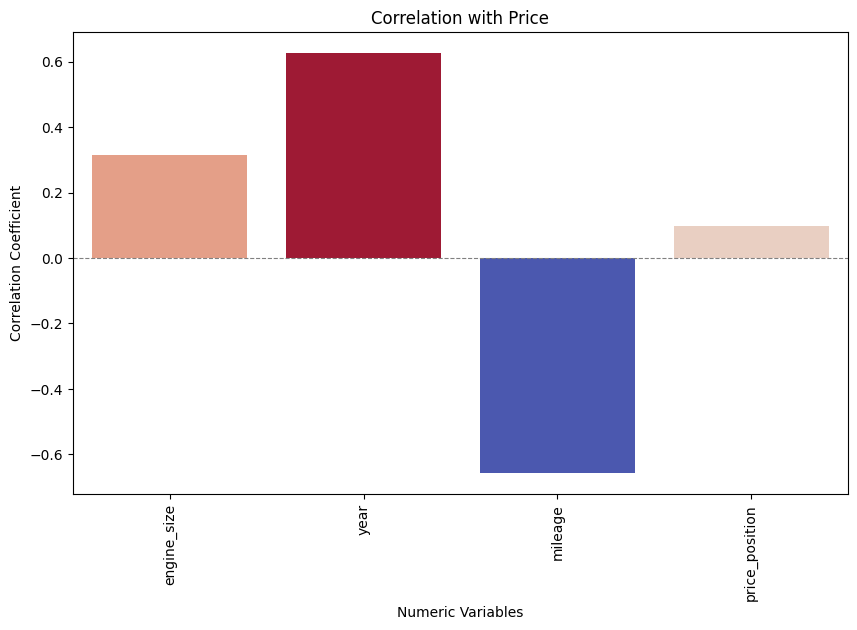

In [151]:
# get correlations with the target variable (price)
target_corr = correlation_matrix["price"].drop("price")

# normalize the correlation values to range between 0 and 1 for coloring
norm = plt.Normalize(target_corr.min(), target_corr.max())

# create a colourmap from 'coolwarm' (to match the above)
cmap = plt.cm.get_cmap("coolwarm")

# generate colours based on the correlation values
colors = cmap(norm(target_corr.values))

# correlations with target variable (price)
plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.index, y=target_corr.values, palette=colors)
plt.title("Correlation with Price")
plt.xlabel("Numeric Variables")
plt.xticks(rotation=90)
plt.ylabel("Correlation Coefficient")
plt.axhline(0, color="grey", linewidth=0.8, linestyle="--")  # reference line (y=0)
plt.show()

### Numerical and Binary Correlations

/var/folders/vr/53g6891d1f95k7gpttqp4mvm0000gn/T/ipykernel_58277/3496852114.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("coolwarm")
/var/folders/vr/53g6891d1f95k7gpttqp4mvm0000gn/T/ipykernel_58277/3496852114.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=correlation_df, x="Variable", y="Correlation", palette=colors)
/var/folders/vr/53g6891d1f95k7gpttqp4mvm0000gn/T/ipykernel_58277/3496852114.py:40: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=correlation_df, x="Variable", y="Correlation", palette=colors)


engine_size   : 0.23
year          : 0.64
mileage       : -0.65
feature_1     : -0.13
feature_2     : -0.13
feature_3     : -0.03
feature_4     : 0.28
feature_5     : 0.37
feature_6     : -0.32
feature_7     : 0.18
feature_8     : -0.05
feature_9     : -0.18
feature_10    : 0.17


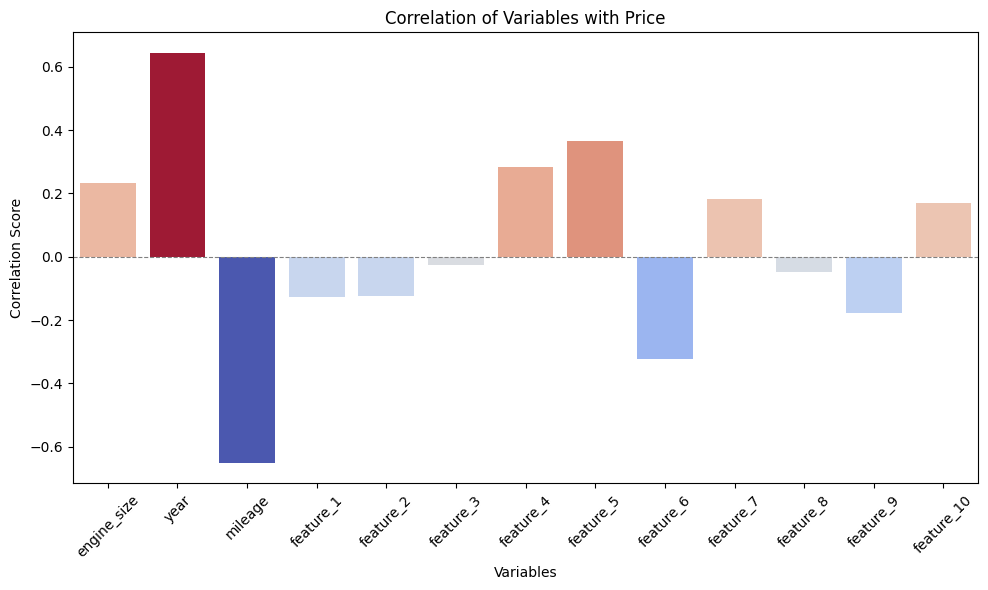

In [152]:
# list to store correlation results
correlation_results = []

# when using `stats` methods, NaNs cannot be present
# drop rows containing NaNs and ignore the `price_position` column
df_test = df_temp.drop(["price_position"], axis=1).dropna()

# correlation for continuous variables
max_name_length = max(len(col) for col in numeric_columns + binary_columns)
for column in numeric_columns:
    if "price" in column:
        break
    correlation, _ = stats.pearsonr(df_test["price"], df_test[column])
    correlation_results.append((column, correlation))
    print(f"{column:<{max_name_length}}: {round(correlation, 2)}")

# point biserial correlation for binary variables
max_name_length = max(len(col) for col in numeric_columns + binary_columns)
for column in binary_columns:
    if "price" in column:
        break
    correlation, _ = stats.pointbiserialr(df_test["price"], df_test[column])
    correlation_results.append((column, correlation))
    print(f"{column:<{max_name_length}}: {round(correlation, 2)}")

# dataframe of results
correlation_df = pd.DataFrame(correlation_results, columns=["Variable", "Correlation"])

# normalize the correlation values to range between 0 and 1 for coloring
norm = plt.Normalize(
    correlation_df["Correlation"].min(), correlation_df["Correlation"].max()
)

# create a colourmap from 'coolwarm' (to match the above)
cmap = plt.cm.get_cmap("coolwarm")

# generate colours based on the correlation values
colors = cmap(norm(correlation_df["Correlation"].values))

# plot
plt.figure(figsize=(10, 6))
sns.barplot(data=correlation_df, x="Variable", y="Correlation", palette=colors)
plt.title("Correlation of Variables with Price")
plt.xticks(rotation=45)
plt.xlabel("Variables")
plt.ylabel("Correlation Score")
plt.axhline(0, color="grey", linewidth=0.8, linestyle="--")  # reference line (y=0)
plt.tight_layout()
plt.show()

- Strong Correlations: The most significant relationships are observed with year (strong positive) and mileage (strong negative)
- Features like feature_5 and feature_4 have moderate positive correlations and should be considered as influential predictors
- Most of the features (e.g., feature_1, feature_2, feature_3) show weak or negligible correlations with price, suggesting they might not be as impactful in explaining the variance of the price
- Surprisingly engine size only has a weak positive correlation with price. Larger engine sizes are slightly associated with higher values in the target variable.

### Categorical Correlations

/var/folders/vr/53g6891d1f95k7gpttqp4mvm0000gn/T/ipykernel_58277/2456128385.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="fuel_type", y="price", data=df_category, palette="viridis")


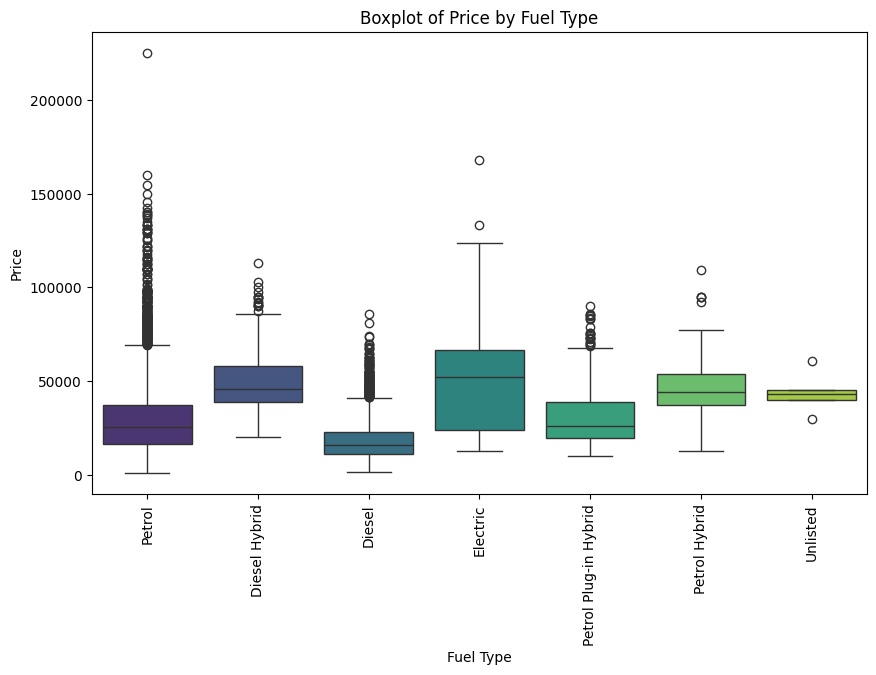

In [153]:
# examine distribution of price within a categorial variable per category
df_category = df_temp[["price", "fuel_type"]]

# plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="fuel_type", y="price", data=df_category, palette="viridis")
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.title("Boxplot of Price by Fuel Type")
plt.xticks(rotation=90)
plt.show()

- clear difference between price values between fuel type category values -> use ANOVA to assess differences in means within categorical variables and perform an F-test to understand target variable significance

In [154]:
# ANOVA on categorical variables

## subset categorial columns and drop rows containing NaNs
df_test = df_temp[["price"] + categorical_columns].dropna()

## perform ANOVA analysis
for col in categorical_columns:
    if df_test[col].nunique() > 1:
        anova_result = stats.f_oneway(
            *[
                df_test["price"][df_test[col] == category]
                for category in df_test[col].unique()
            ]
        )
        print(
            f"{col}: ANOVA F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}"
        )

model: ANOVA F-statistic: 154.7642134641661, p-value: 0.0
body_type: ANOVA F-statistic: 141.7121176485871, p-value: 3.595076140615374e-172
fuel_type: ANOVA F-statistic: 453.8992625751436, p-value: 0.0
transmission: ANOVA F-statistic: 1412.1047948429277, p-value: 5.99619624072532e-287
derivative: ANOVA F-statistic: 47.25043917984988, p-value: 0.0
plate: ANOVA F-statistic: 241.1406313592168, p-value: 0.0
colour: ANOVA F-statistic: 37.688648061656856, p-value: 1.7109336870934761e-100
area: ANOVA F-statistic: 6.2497752652772895, p-value: 1.9914077845319898e-82


- All F-statistics are large, indicating the categorical variables have a highly significant effect on the continuous target variable (price)
- The magnitude of the F-statistics given an indiciation of the relative power of each categorical varibale, with the transmission and fuel_type having a large effect than than area or colour

## !!! Handling Missing Values !!!


In [155]:
# reminder of missing values
df_temp.isna().sum()

make                 0
model                0
body_type            0
fuel_type            0
engine_size        142
transmission         0
derivative           4
plate              799
year               828
mileage              0
price                0
colour             141
area                 0
price_position    1212
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
feature_9            0
feature_10           0
dtype: int64

### Engine Size (Missing Values)


- could we replace missing `engine_size` values by examining the derivative field and extractig the `engine_size` from the text, or matching derivative from other complete rows and using the `engine_size`?
- could take the modal value from a grouping of other variable and impute this missing value in place?


In [156]:
# subset for engine_size missing values - pre imputation
df_missing = df_temp[df_temp["engine_size"].isna() == True]
print(df_temp[df_temp["engine_size"].isna() == True].shape)
df_missing.head(10)

(142, 24)


,make,model,body_type,fuel_type,engine_size,transmission,derivative,plate,year,mileage,price,colour,area,price_position,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
19,BMW,iX,SUV,Electric,NaN,Automatic,50 111.5kWh M Sport Auto xDrive 5dr 22kW Charger,NaN,NaN,10,105490,Black,DE,NaN,0,0,1,0,1,0,1,0,0,0
20,BMW,iX3,SUV,Electric,NaN,Automatic,80kWh M Sport Auto 5dr,NaN,NaN,0,60490,Grey,WA,NaN,1,1,1,1,1,0,1,0,0,1
95,BMW,iX3,SUV,Electric,NaN,Automatic,80kWh M Sport Pro Auto 5dr,NaN,NaN,0,63999,Blue,ST,NaN,1,1,1,1,1,1,1,0,0,1
191,BMW,iX,SUV,Electric,NaN,Automatic,50 111.5kWh M Sport Auto xDrive 5dr 22kW Charger,NaN,NaN,10,117999,Black,CW,NaN,1,0,1,0,1,1,1,0,0,0
193,BMW,i3,Hatchback,Electric,NaN,Automatic,33kWh Auto 5dr,18,2018.0,24196,16799,Multicolour,NW,87.4,0,0,0,0,0,1,1,0,0,0
323,BMW,i7,Saloon,Electric,NaN,Automatic,60 105.7kWh M Sport Auto xDrive 4dr,72,2023.0,50,167870,Black,LE,NaN,1,0,1,1,1,0,1,0,0,0
468,BMW,i3,Hatchback,Electric,NaN,Automatic,42.2kWh Auto 5dr,70,2020.0,15935,24795,Grey,BT,108.1,0,1,0,0,1,1,1,0,1,0
592,BMW,iX,SUV,Electric,NaN,Automatic,50 111.5kWh M Sport Auto xDrive 5dr 11kW Charger,NaN,NaN,0,97990,Black,WA,NaN,1,0,1,0,1,0,1,0,0,0
593,BMW,iX3,SUV,Electric,NaN,Automatic,80kWh M Sport Auto 5dr,NaN,NaN,10,66515,Grey,S,NaN,0,0,0,0,0,0,0,0,0,0
598,BMW,2 Series Gran Coupe,Saloon,Petrol,NaN,Manual,BMW 2 Series Gran Coupe 218i M Sport,NaN,NaN,10,35270,NaN,CV,NaN,1,0,0,0,0,0,1,0,0,0


In [157]:
df_temp.query("fuel_type == 'Electric' & engine_size == 1")

,make,model,body_type,fuel_type,engine_size,transmission,derivative,plate,year,mileage,price,colour,area,price_position,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
9647,BMW,i3,Hatchback,Electric,1.0,Automatic,125kW 42kWh 5dr Auto,20,2020.0,21613,20500,Black,HD,NaN,1,1,0,0,1,0,1,0,0,0


- some instances, where `engine_size = NaN`, fuel_type is `Electric` -> investigate further and decide on method to handle the NaN values -> convert engine_size to categorical and replace 'Electric' fuel_type NaNs with `Electric`?
- can other engine types be handled by finding similar rows using other variable groupings and perform imputation of the modal value?


#### Engine Size - Electic Vehicles

In [158]:
# examining engine_size of `fuel_type = Electric`
df_temp.query("fuel_type == 'Electric'").groupby(["fuel_type"])["engine_size"].unique()

fuel_type
Electric    [nan, 0.0, 1.0]
Name: engine_size, dtype: object

- making the assumption that were a vehcile has `fuel_type = Electric`, then `engine_size = 0`

In [159]:
# replace `Electric` `fuel_type` vehicles `engine_size` with 0
df_temp.loc[(df_temp["fuel_type"] == "Electric"), "engine_size"] = 0

#### Engine Size - Modal Imputation

In [160]:
# subset for engine_size missing values - mid imputation
df_missing = df_temp[df_temp["engine_size"].isna() == True]
print(df_missing.shape)
df_missing.head(5)

(28, 24)


,make,model,body_type,fuel_type,engine_size,transmission,derivative,plate,year,mileage,price,colour,area,price_position,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
598,BMW,2 Series Gran Coupe,Saloon,Petrol,NaN,Manual,BMW 2 Series Gran Coupe 218i M Sport,NaN,NaN,10,35270,NaN,CV,NaN,1,0,0,0,0,0,1,0,0,0
1192,BMW,X5,SUV,Diesel,NaN,Automatic,BMW X5 xDrive40d M Sport,NaN,NaN,10,74265,Black,LE,NaN,0,0,0,0,0,0,1,0,0,0
1837,BMW,1 Series,Hatchback,Petrol,NaN,Automatic,BMW 1 Series 128ti,NaN,NaN,10,36910,White,B,NaN,0,0,0,0,1,0,0,0,0,0
2001,BMW,Z3,Convertible,Petrol,NaN,Manual,1.9 2dr,S,1999.0,46000,5500,NaN,DY,NaN,0,0,0,0,0,1,0,1,0,0
2331,BMW,X3,SUV,Diesel,NaN,Automatic,BMW X3 xDrive20d M Sport,NaN,NaN,10,52615,Black,B,NaN,0,0,0,0,0,0,1,0,0,0


In [161]:
## replacing missing `engine_size` values using the mode `engine_size` value per `model` and `body_type` combination

# rows without missing values
complete_rows = df_temp[df_temp["engine_size"].isna() == False]

# group by `model` and `body_type` and calculate the mode `engine_size` for each group
mode_per_group = (
    complete_rows.groupby(["model", "body_type"])["engine_size"]
    .agg(lambda x: x.mode())
    .reset_index()
)

# function to apply mode per category to missing values


def fill_missing_var_with_mode(vars, row):
    mode_value = mode_per_group.query(
        "model == @row['model'] & body_type == @row['body_type']"
    )["engine_size"]

    # check if mode value found
    if len(mode_value) > 0:
        # if multiple modes, cannot select a value
        if "[" in str(mode_value.values[0]):
            return np.nan
        else:
            # use mode value
            return mode_value.values[0]
    else:
        return np.nan


# apply function to fill in the missing values in rows with missing values
missing_value_indexes = df_raw[df_raw["engine_size"].isna() == True].index

for idx in missing_value_indexes:
    df_temp.loc[idx, "engine_size"] = fill_missing_var_with_mode(
        ["engine_size", "body_type"], df_temp.iloc[idx]
    )

In [162]:
# subset for engine_size missing values - post imputation
df_missing = df_temp[df_temp["engine_size"].isna() == True]
print(df_missing.shape)
df_missing.head(5)

(4, 24)


,make,model,body_type,fuel_type,engine_size,transmission,derivative,plate,year,mileage,price,colour,area,price_position,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
2001,BMW,Z3,Convertible,Petrol,NaN,Manual,1.9 2dr,S,1999.0,46000,5500,NaN,DY,NaN,0,0,0,0,0,1,0,1,0,0
2459,BMW,M4,Unlisted,Petrol,NaN,Automatic,BMW M4 Competition Coupe M4 Competition,NaN,NaN,10,78995,Yellow,CT,NaN,0,1,0,0,0,0,1,0,0,0
3076,BMW,Alpina B6,Unlisted,Unlisted,NaN,Unlisted,NaN,10,2010.0,42500,39995,NaN,N,NaN,1,0,0,1,0,0,0,0,0,0
9528,BMW,iX,SUV,Electric,NaN,Automatic,50 111.5kWh M Sport Auto xDrive 5dr,NaN,NaN,10,99990,Blue,TA,NaN,1,0,0,0,1,0,1,0,0,0


- only 3 rows with missing engine sizes remain -> happy for these rows to be dropped as no matching group was found

### Colour (Missing Values)


In [163]:
# possible colour values
df_temp["colour"].unique()

array(['Blue', 'Grey', 'Black', 'Silver', 'Multicolour', 'White',
       'Orange', nan, 'Red', 'Purple', 'Green', 'Beige', 'Bronze', 'Gold',
       'Yellow', 'Brown'], dtype=object)

In [164]:
# subset for colour missing values - pre imputation
df_missing = df_temp[df_temp["colour"].isna() == True]
print(df_missing.shape)
df_missing.head(5)

(141, 24)


,make,model,body_type,fuel_type,engine_size,transmission,derivative,plate,year,mileage,price,colour,area,price_position,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
98,BMW,5 Series,Saloon,Diesel,3.0,Automatic,3.0 530d M Sport Auto Euro 6 (s/s) 4dr,19,2019.0,44500,28500,NaN,NG,106.6,1,1,1,0,1,1,1,0,1,0
196,BMW,5 Series,Saloon,Petrol Plug-in Hybrid,2.0,Automatic,2.0 530e 9.2kWh M Sport Auto Euro 6 (s/s) 4dr,69,2019.0,59172,25000,NaN,NG,101.0,1,1,1,0,1,1,0,0,1,0
275,BMW,X5,SUV,Diesel Hybrid,3.0,Automatic,3.0 40d MHT M Sport Auto xDrive Euro 6 (s/s) 5dr,NaN,NaN,0,71500,NaN,LS,NaN,1,1,1,0,1,1,0,0,0,0
278,BMW,M4,Coupe,Petrol,3.0,Automatic,3.0 BiTurbo Competition M Steptronic xDrive Eu...,NaN,NaN,1,95000,NaN,RG,NaN,1,0,1,0,1,1,1,0,0,0
283,BMW,8 Series,Convertible,Petrol,4.4,Automatic,4.4 M850i V8 Steptronic xDrive Euro 6 (s/s) 2dr,68,2019.0,24985,53995,NaN,SN,108.1,1,1,1,0,1,1,1,0,0,0


In [165]:
# to retain as much data as possible, replace NaNs in `colour` with 'Unknown'
df_temp.loc[(df_temp["colour"].isna()), "colour"] = "Unknown"

In [166]:
# subset for colour missing values - post imputation
df_missing = df_temp[df_temp["colour"].isna() == True]
print(df_missing.shape)
df_missing.head(5)

(0, 24)


,make,model,body_type,fuel_type,engine_size,transmission,derivative,plate,year,mileage,price,colour,area,price_position,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10


### Derivative (Missing Values)


In [167]:
df_raw["derivative"].unique()

array(['2.0 20i xLine Auto xDrive Euro 6 (s/s) 5dr',
       '218i M Sport Gran Coupe', '1.5 218i M Sport Euro 6 (s/s) 4dr',
       ..., 'E39 - MANUAL', '2.0 318d SE Auto Euro 5 (s/s) 4dr',
       '2.0 318i Sport Plus Edition Euro 5 2dr'], dtype=object)

- derivative is extremely hard to impute as it is essentially a description of multiple aspects of the vehicle (engine size, number of doors, mode type, etc..., and most of this information is captured in the other columns)
- for the purpose of this analysis, rather than inmpute a value, the `derivative` column will be dropped and thus no missing value imputation is required
- this decision is backed up by the lowest F-score (in comparison the other F-scores when calculating ANOVA of categorical variables with price)

### Plate and Year (Missing Values)


- year has the highest magnitude correlation with the target variable -> we want to retain as much information in this column as possible!
- plate has a reasonable ANOVA score, but plate and year are intrinsically linked (year determines the plate value) -> it's understood that the plate numbers are changed every 6 months at the beginning of March and September, so this does not completely align with year (and I'm sure there's a difference in price between a 24 and 74 (2024) but we're assuming this doesn't exist in this analysis) -> as year and plate are linked, we will drop `plate` from this analysis

In [168]:
# possible plate values
df_temp["plate"].unique()

array(['21', '71', nan, '62', '67', '18', '68', '19', '66', '13', '69',
       '63', '58', '65', '16', '64', '70', '61', '12', '9', '20', '72',
       '17', '14', '15', '22', '7', '60', '6', '57', '54', '52', '59',
       '8', '55', '53', '10', '4', '11', '5', '51', 'S', '56', 'R', '3',
       'Y', '2', 'T', '23', 'W', 'J', 'M', 'N', 'P', 'G', 'V', 'B', 'K'],
      dtype=object)

In [169]:
# possible year values
df_temp["year"].unique()

array([2021.,   nan, 2022., 2012., 2017., 2018., 2019., 2016., 2013.,
       2020., 2008., 2015., 2014., 2011., 2009., 2007., 2010., 2006.,
       2004., 2002., 2023., 2005., 2003., 2001., 1999., 1997., 1998.,
       1982., 2000., 1992., 1995., 1996., 1989., 1985., 1991.])

In [170]:
# subset for year missing values - pre imputation
df_missing = df_temp[(df_temp["year"].isna() == True)]
print(df_missing.shape)
df_missing.head(5)

(828, 24)


,make,model,body_type,fuel_type,engine_size,transmission,derivative,plate,year,mileage,price,colour,area,price_position,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
2,BMW,2 Series Gran Coupe,Saloon,Petrol,1.5,Manual,1.5 218i M Sport Euro 6 (s/s) 4dr,NaN,NaN,10,35510,Blue,PE,NaN,1,1,1,0,1,0,1,1,0,0
10,BMW,1 Series,Hatchback,Diesel,2.0,Automatic,2.0 120d M Sport (LCP) Auto Euro 6 (s/s) 5dr,NaN,NaN,10,39331,Black,UB,NaN,1,1,1,0,0,0,0,1,0,0
19,BMW,iX,SUV,Electric,0.0,Automatic,50 111.5kWh M Sport Auto xDrive 5dr 22kW Charger,NaN,NaN,10,105490,Black,DE,NaN,0,0,1,0,1,0,1,0,0,0
20,BMW,iX3,SUV,Electric,0.0,Automatic,80kWh M Sport Auto 5dr,NaN,NaN,0,60490,Grey,WA,NaN,1,1,1,1,1,0,1,0,0,1
45,BMW,M8 Gran Coupe,Saloon,Petrol,4.4,Automatic,4.4i V8 Competition Steptronic 4WD Euro 6 (s/s...,NaN,NaN,5,138205,Blue,CH,NaN,1,1,1,0,1,1,1,0,0,0


#### Year – using Plate
- as `year` and `plate` are linked, can we use the `plate` value to impute the `year` value?

In [171]:
df_available = df_temp[
    (df_temp["year"].isna() == True) & (df_temp["plate"].isna() == False)
][["plate", "year"]]
print(df_available.shape)
df_available.head(5)

(33, 2)


,plate,year
180,18,NaN
843,19,NaN
1429,18,NaN
1430,70,NaN
2049,69,NaN


In [172]:
# mapping of time of year (first digit of plate values) to base year
time_of_year_map = {7: 2020, 2: 2020, 6: 2010, 1: 2010, 5: 2000, 0: 2000}

plate_map = {}
for plate in df_available["plate"].unique():
    if len(plate) > 1:
        # first digit is time of year
        time_of_year = int(plate[0])
        # second digit is year number
        year_raw = int(plate[1])
        # map time of year to get year base
        year_base = time_of_year_map[time_of_year]
        # calculate year valye
        year = year_raw + year_base
        # add mapping
        plate_map[plate] = year
    else:
        # not able to map
        plate_map[plate] = np.nan

print(plate_map)

{'18': 2018, '19': 2019, '70': 2020, '69': 2019, '17': 2017, '21': 2021, '67': 2017, '72': 2022, '22': 2022, '57': 2007}


In [173]:
# apply plate mapping to fill in the missing values in rows with calculated plate mapping value
missing_value_indexes = df_temp[df_temp["year"].isna() == True].index

for idx in missing_value_indexes:
    # only possible if mapping key exists
    if df_temp.loc[idx, "plate"] in plate_map.keys():
        df_temp.loc[idx, "year"] = plate_map[df_temp.loc[idx, "plate"]]

In [174]:
# subset for year missing values - mid imputation
df_missing = df_temp[(df_temp["year"].isna() == True)]
print(df_missing.shape)
df_missing.head(5)

(795, 24)


,make,model,body_type,fuel_type,engine_size,transmission,derivative,plate,year,mileage,price,colour,area,price_position,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
2,BMW,2 Series Gran Coupe,Saloon,Petrol,1.5,Manual,1.5 218i M Sport Euro 6 (s/s) 4dr,NaN,NaN,10,35510,Blue,PE,NaN,1,1,1,0,1,0,1,1,0,0
10,BMW,1 Series,Hatchback,Diesel,2.0,Automatic,2.0 120d M Sport (LCP) Auto Euro 6 (s/s) 5dr,NaN,NaN,10,39331,Black,UB,NaN,1,1,1,0,0,0,0,1,0,0
19,BMW,iX,SUV,Electric,0.0,Automatic,50 111.5kWh M Sport Auto xDrive 5dr 22kW Charger,NaN,NaN,10,105490,Black,DE,NaN,0,0,1,0,1,0,1,0,0,0
20,BMW,iX3,SUV,Electric,0.0,Automatic,80kWh M Sport Auto 5dr,NaN,NaN,0,60490,Grey,WA,NaN,1,1,1,1,1,0,1,0,0,1
45,BMW,M8 Gran Coupe,Saloon,Petrol,4.4,Automatic,4.4i V8 Competition Steptronic 4WD Euro 6 (s/s...,NaN,NaN,5,138205,Blue,CH,NaN,1,1,1,0,1,1,1,0,0,0


#### Year – using mode per group


In [175]:
## replacing missing `year` values using the mode `year` value per `model`, `body_type` and `derviative` combination
## `derivative` used as this is essentially a vehicle description and will help flag specific cars

# rows without missing values
complete_rows = df_temp[df_temp["year"].isna() == False]

# group by  `model`, `body_type` and `derviative` and calculate the mode `year` for each group
mode_per_group = (
    complete_rows.groupby(["model", "body_type", "derivative"])["year"]
    .agg(lambda x: x.mode())
    .reset_index()
)

# function to apply mode per category to missing values


def fill_missing_var_with_mode(vars, row):
    mode_value = mode_per_group.query(
        "model == @row['model'] & body_type == @row['body_type'] & derivative == @row['derivative']"
    )["year"]

    # check if mode value found
    if len(mode_value) > 0:
        # if multiple modes, cannot select a value
        if "[" in str(mode_value.values[0]):
            return np.nan
        else:
            # use mode value
            return mode_value.values[0]
    else:
        return np.nan


# apply function to fill in the missing values in rows with missing values
missing_value_indexes = df_temp[df_temp["year"].isna() == True].index

for idx in missing_value_indexes:
    df_temp.loc[idx, "year"] = fill_missing_var_with_mode(
        ["engine_size", "body_type", "derivative"], df_temp.iloc[idx]
    )

In [176]:
# subset for year missing values - post imputation
df_missing = df_temp[(df_temp["year"].isna() == True)]
print(df_missing.shape)
df_missing.head(5)

(225, 24)


,make,model,body_type,fuel_type,engine_size,transmission,derivative,plate,year,mileage,price,colour,area,price_position,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
10,BMW,1 Series,Hatchback,Diesel,2.0,Automatic,2.0 120d M Sport (LCP) Auto Euro 6 (s/s) 5dr,NaN,NaN,10,39331,Black,UB,NaN,1,1,1,0,0,0,0,1,0,0
19,BMW,iX,SUV,Electric,0.0,Automatic,50 111.5kWh M Sport Auto xDrive 5dr 22kW Charger,NaN,NaN,10,105490,Black,DE,NaN,0,0,1,0,1,0,1,0,0,0
45,BMW,M8 Gran Coupe,Saloon,Petrol,4.4,Automatic,4.4i V8 Competition Steptronic 4WD Euro 6 (s/s...,NaN,NaN,5,138205,Blue,CH,NaN,1,1,1,0,1,1,1,0,0,0
95,BMW,iX3,SUV,Electric,0.0,Automatic,80kWh M Sport Pro Auto 5dr,NaN,NaN,0,63999,Blue,ST,NaN,1,1,1,1,1,1,1,0,0,1
108,BMW,5 Series,Saloon,Petrol Plug-in Hybrid,2.0,Automatic,2.0 530e 12kWh M Sport Steptronic Euro 6 (s/s)...,NaN,NaN,5,52990,Black,RG,NaN,1,0,1,0,1,0,1,0,0,0


- there is no other method to impute the missing values from the `year` variable -> drop rows containing NaNs in this field - it doesn't feel right to input a 'Unknown' value as a placeholder, as this'll convert the variable to categorical, removing the numeric value of the variable

In [178]:
# missing values - remaining missingness
df_temp.drop(["plate", "derivative", "price_position"], axis=1).isna().sum()

make              0
model             0
body_type         0
fuel_type         0
engine_size       4
transmission      0
year            225
mileage           0
price             0
colour            0
area              0
feature_1         0
feature_2         0
feature_3         0
feature_4         0
feature_5         0
feature_6         0
feature_7         0
feature_8         0
feature_9         0
feature_10        0
dtype: int64

## Output

As discussed above:
- drop `plate`, it is intrinsically linked to `year`, which holds a high correlation with `price`
- drop `derivative`, the field is essentially a text description of the vehcile, with the information captured across some of the other fields - there are 2024 different values, so groups will be small and lack power of information
- keep `price_position`, but ignore the NaNs -> this field will be useful in post-modelling analysis
- finally, drop any remaining rows containing NaNs

In [188]:
# extract `price_position`
df_price_position = df_temp["price_position"]

# drop columns
df_clean = df_temp.drop(["plate", "derivative", "price_position"], axis=1)

# drop rows containing NaNs
df_clean = df_clean.dropna()

# rejoin `price_position` using index
df_out = pd.merge(df_clean, df_price_position, left_index=True, right_index=True)

In [189]:
# missing values - remaining missingness
df_out.isna().sum()

make                0
model               0
body_type           0
fuel_type           0
engine_size         0
transmission        0
year                0
mileage             0
price               0
colour              0
area                0
feature_1           0
feature_2           0
feature_3           0
feature_4           0
feature_5           0
feature_6           0
feature_7           0
feature_8           0
feature_9           0
feature_10          0
price_position    984
dtype: int64

In [190]:
# percentage missingness

ndp_clean = df_out.shape[0] * df_out.shape[1]
nrows_clean = df_out.shape[0]

## total data points
ndp_missing = df_out.isna().sum().sum()
print(f"Missingness (Total Data Points): {ndp_missing/ndp:.2%}")

## data points, ignoring `price_position`
ndp_missing_alt = df_out.drop(["price_position"], axis=1).isna().sum().sum()
print(
    f"Missingness (Data Points, `price_position` dropped): {ndp_missing_alt/(ndp_clean-(1*nrows_clean)):.2%}"
)

## total rows
df_complete = df_out.dropna()
nrows_complete = df_complete.shape[0]
print(f"Missingness (Total Rows): {1 - (nrows_complete/nrows):.2%}")

## rows, ignoring `price_position`
df_complete_alt = df_out.drop(["price_position"], axis=1).dropna()
nrows_complete_alt = df_complete_alt.shape[0]
print(
    f"Missingness (Rows, `price_position` dropped): {1 - (nrows_complete_alt/nrows_clean):.2%}"
)

Missingness (Total Data Points): 0.42%
Missingness (Data Points, `price_position` dropped): 0.00%
Missingness (Total Rows): 12.46%
Missingness (Rows, `price_position` dropped): 0.00%


In [193]:
# proportion of information retained
print(f"Data Points Retained: {ndp_clean/ndp:.2%}")
print(f"Rows Retained: {nrows_clean/nrows:.2%}")

Data Points Retained: 89.50%
Rows Retained: 97.63%
